Loading Datasets

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import torchvision
import torchvision.transforms as transforms
trainset= torchvision.datasets.CIFAR10(root='./data' , train=True,download=True,transform=transforms.ToTensor())

0it [00:00, ?it/s]

 99%|█████████▉| 169402368/170498071 [00:10<00:00, 21022041.58it/s]

In [0]:
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [0]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [0]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(images.shape)

print(images[0].shape)
print(labels[0].item())


torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
1


Visualising Data

In [0]:
img=images[0]
print(type(img))

<class 'torch.Tensor'>


In [0]:
nping=img.numpy()
print(nping.shape)

(3, 32, 32)


In [0]:
nping=np.transpose(nping,(1,2,0))
#here 1,2,0 is the indexes or order to be followed in transposing
#that is index 1=32 ,index 2=32 , index 0=3}-For nping above
print(nping.shape)

(32, 32, 3)


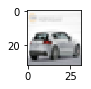

In [0]:
plt.figure(figsize=(1,1))
plt.imshow(nping)
plt.show()

In [0]:
def imshow(img):
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

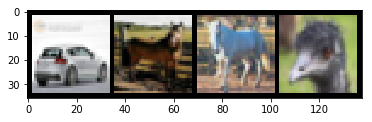

car horse horse bird


In [0]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

**Single Conv. Layer**

In [0]:
import torch.nn as nn
       
class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3,padding=(1,1),stride=(2,2)) #padding=(1,1), stride=(2,2)
      
      
  def forward(self, x):
    x = self.conv1(x)
    return x

In [0]:
net= FirstCNN()

In [0]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [0]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [0]:
out1=out[0,0,:,:].detach().numpy()
print(out1.shape)

(16, 16)


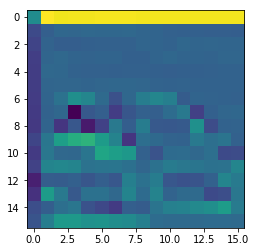

In [0]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

**Deep CNN**

In [0]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
        nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
  def forward(self, x):
    x = self.model(x)
    return x

In [0]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

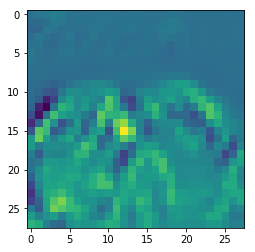

In [0]:
plt.imshow(out[0,0,:,:].detach().numpy())

In [0]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3, self).__init__()
    self.model = nn.Sequential(
          nn.Conv2d(3, 6, 5),   # (N, 3, 32, 32) -> (N, 6, 28, 28)
          nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N, 6, 14, 14)\n",
          nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)\n",
          nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)\n",
               )
             
  def forward(self, x):
    x = self.model(x)
    return x

In [0]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

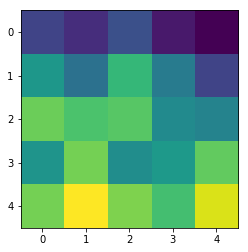

In [0]:
plt.imshow(out[0, 0, :, :].detach().numpy())

**LeNet Network**

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
              nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)\n",
              nn.Tanh(),
              nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)\n",
              nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  \n",
              nn.Tanh(),
              nn.AvgPool2d(2, stride=2) # (N,16, 10, 10) -> (N, 16, 5, 5)\n",
    )
    
    self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)\n",
                    nn.Tanh(),
                    nn.Linear(120,84),          # (N, 120) -> (N, 84)\n",
                    nn.Tanh(),
                    nn.Linear(84,10)            # (N, 84)  -> (N, 10)\n",
              
     )
      
  def forward(self, x):
          print(x.shape)
          x = self.cnn_model(x)
          print(x.shape)
          x = x.view(x.size(0), -1)#view used to reshape tensors that is from 4 dim. to 1 dim/\.
          print(x.shape)
          x = self.fc_model(x)
          print(x.shape)
          return x

In [0]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [0]:
print(out)

tensor([[-0.0391,  0.0428,  0.0883, -0.0088,  0.0232, -0.1182, -0.0668,  0.0131,
         -0.1110,  0.0755],
        [-0.0481,  0.0243,  0.0837, -0.0054,  0.0854, -0.1158, -0.0611,  0.0363,
         -0.0837,  0.0817],
        [-0.0406,  0.0258,  0.0746,  0.0071,  0.0459, -0.1227, -0.0688,  0.0160,
         -0.1224,  0.0785],
        [-0.0401,  0.0256,  0.0868, -0.0070,  0.0566, -0.1194, -0.0697,  0.0187,
         -0.1129,  0.0667]], grad_fn=<AddmmBackward>)


In [0]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)
print(max_values)

tensor([2, 4, 9, 2])
tensor([0.0883, 0.0854, 0.0785, 0.0868])


**Training Lenet**

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
              nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)\n",
              nn.Tanh(),
              nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)\n",
              nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  \n",
              nn.Tanh(),
              nn.AvgPool2d(2, stride=2) # (N,16, 10, 10) -> (N, 16, 5, 5)\n",
    )
    
    self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)\n",
                    nn.Tanh(),
                    nn.Linear(120,84),          # (N, 120) -> (N, 84)\n",
                    nn.Tanh(),
                    nn.Linear(84,10)            # (N, 84)  -> (N, 10)\n",
              
     )
      
  def forward(self, x):
          print(x.shape)
          x = self.cnn_model(x)
          print(x.shape)
          x = x.view(x.size(0), -1)#view used to reshape tensors that is from 4 dim. to 1 dim/\.
          print(x.shape)
          x = self.fc_model(x)
          print(x.shape)
          return x

In [0]:
batch_size=128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
    
    return 100* correct/total#returnung Percentage of Accuracy

In [0]:
net=LeNet()

In [0]:
import torch.optim as optim


loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
to

170500096it [00:30, 21022041.58it/s]                               

torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
to

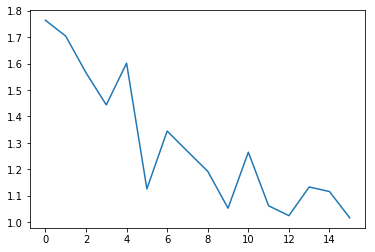

CPU times: user 4min, sys: 7.04 s, total: 4min 7s
Wall time: 4min 6s


In [0]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16
       
for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
          inputs, labels = data
          opt.zero_grad()
          outputs = net(inputs)
          loss = loss_fn(outputs, labels)
          loss.backward()
          opt.step()
  
          loss_arr.append(loss.item())
    
  loss_epoch_arr.append(loss.item())
      
      
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
plt.plot(loss_epoch_arr)
plt.show()

**Move to GPU**

In [0]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [0]:
%%time
max_epochs = 16
       
for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)
  
      opt.zero_grad()
      outputs = net(inputs)
      loss = loss_fn(outputs, labels)
      loss.backward()
      opt.step()
    
  print('Epoch: %d/%d' % (epoch, max_epochs))

torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
torch.Size([128, 10])
torch.Size([128, 3, 32, 32])
torch.Size([128, 16, 5, 5])
torch.Size([128, 400])
to

**Visualising Intermediate Layers**

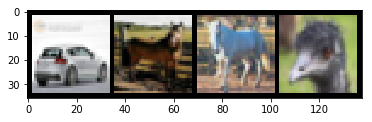

In [0]:
imshow(torchvision.utils.make_grid(images))

In [0]:
net = net.to('cpu')

In [0]:
out = net(images)
print(out.shape)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])
torch.Size([4, 10])


In [0]:
out = net.cnn_model[0](images) #To get partial output that is here [0] means 
#the first "conv2d" layer we had made ,we apply on the images and get the dimension as output 
out.shape

torch.Size([4, 6, 28, 28])

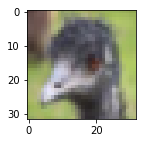

In [0]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


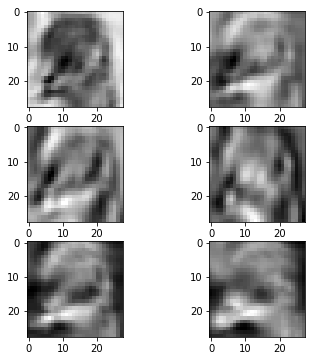

In [0]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
  ax1 = plt.subplot(3, 2, i+1)
  plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

**Excersises**

In [0]:
#Modify LeNet to work with ReLU instead of Tanh -> What is the impact on training time, final loss
#We have observed over-fitting -> Use weight_decay in torch.optim to add L2 regularisation
#Instead of CIFAR10, use the MNIST data available from `torchvision.datasets.MNIST`. 
#Download and visualise MNIST data.
#But importantly MNIST images have only 1 channel instead of 3 channels in the case of CIFAR10. Modify LeNet to work with MNIST. 
#Train and find optimised test accuracy